<a href="https://colab.research.google.com/github/sayan0506/Autoencoder-and-PCA-comparative-study/blob/master/Latent_Space_Distribution_of_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Latent Space Distribution of Autoencoder**

# **Module Imports**

In [13]:
import tensorflow as tf
import keras

# checking temsorflow version
print(tf.__version__)

import numpy as np
import matplotlib.pyplot as plt



2.4.1


# **Define Dataset**

Here, we are trying to generate a custom dataset, where we will try to reduce the dimensionality using a simple Autoencoder Model

In [8]:
def generate_data(m):
  '''plots m random points in 3D plane'''

  angles =np.random.rand(m) * 3 * np.pi / 2 - 0.5
  # creating empty numpy array of shape m*3(m points each having 3 corordinates)
  data = np.empty((m,3))
  data[:,0] = np.cos(angles) + np.sin(angles)/2 + 0.1*np.random.randn(m)/2
  data[:,1] = np.sin(angles) * 0.7 + 0.1 * np.random.randn(m) / 2
  data[:,2] = data[:, 0] * 0.1 + data[:, 1] * 0.3 + 0.1*np.random.randn(m)

  return data


Generating datapoints


In [9]:
x_train = generate_data(100)
# normalizing the data
x_train = x_train + x_train.mean(axis = 0, keepdims = 0)


# **Data Visualization**

Visualize the 3D representation of the data

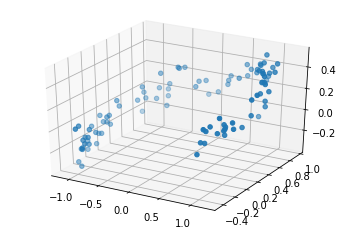

In [12]:
# plotting the 3D isualization of the data
ax = plt.axes(projection = '3d')
ax.scatter3D(x_train[:, 0], x_train[:, 1], x_train[:, 2], cmap = 'Reds')
plt.show()

# **Autoencoder Model**

We will build an autoencoder, and represnt the latent space as encoded data or dimensionality reduced data of the 3D points by converting the 3d space to 2d latent space,

In [16]:
# Building a sequential encoder model having 1 dense layer or latent layer of 2 neurons
encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape = [3])])
# Building a sequential encoder model having 1 dense layer or decoder layer decodes from 2d latent space
# to 3d output conversion
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape = [2])])

autoencoder = keras.models.Sequential([encoder, decoder])

print('Model Summary')
autoencoder.summary()


Model Summary
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 2)                 8         
_________________________________________________________________
sequential_3 (Sequential)    (None, 3)                 9         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


# **Model Compile**

We want our autoencoder to train so that it can reconstruct the data having 'mean_squared_error' as loss function, and optimizer as 'Adam' with learning rate = 0.1 

In [20]:
autoencoder.compile(loss = "mse", optimizer= tf.keras.optimizers.SGD(lr = 0.1))


# **Model Training**

Training the model with earlystoppping callback, which monitors the training loss only

In [21]:
history = autoencoder.fit(x_train, x_train, epochs = 200, callbacks=[tf.keras.callbacks.EarlyStopping(monitor = 'loss')])

Epoch 1/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 8/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0030


# **Visualize the trained latent Space**

In [24]:
# encode the data
codings = encoder.predict(x_train)

# let us find the encodes representation of the inputs
print(f'Input points: {x_train[0]}')
print(f'Input points: {codings[0]}')

Input points: [-0.06439971  0.64676936  0.18833138]
Input points: [0.52489305 0.14045253]


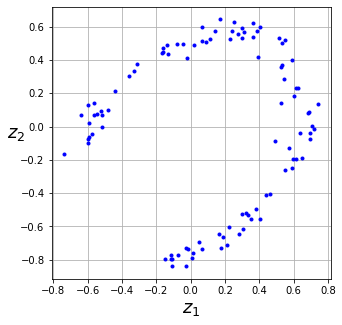

In [26]:
# plot all the encoder outputs after training
fig = plt.figure(figsize=(5,5))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize = 18)
#$Z_1$ helps to produce symbol z suffix 1, dollar makes the symbolic repreentation
# rotation = 0 implies the z label will be horizontal
plt.ylabel("$z_2$", fontsize = 18, rotation = 0)
plt.grid(True)
plt.show()

**Awesome, we can find that, the latent space finds the pattern in the data in 2D space.**